<a href="https://colab.research.google.com/github/aryan-at-ul/graph_neural_networks_basics/blob/main/bfs_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### todo remove nodes that will create a cycle, if after removing node graph is diconnected introudce a new node and connect to that and add that node to list of all nodes with its mem address

1
521
337
921
659
171
190
726
536
458
333
22
631
242
392
866
734
141
840
83
498
719
960
11
89
336
156
812
469
245
423
598
576
473
665
875
809
608
450
92
313
522
874
53
621
288
97
459
158
691
359
352
286
855
795
211
437
585
910
903
894
757
968
419
142
902
489
768
678
764
557
581
68
956
414
416
306
496
189
181
626
696
988
821
462
120
602
323
953
302
911
476
743
502
413
950
409
904
276
625
90
37
305
578
715
939
161
699
838
562
827
724
681
988
470
34
196
658
51
948
166
502
113
296
91
888
948
738
613
619
508
30
266
30
991
274
901
93
104
285
584
119
460
661
512
55
685
841
507
371
846
857
876
470
613
574
271
328
583
439
356
147
564
519
410
356
456
615
55
711
407
825
680
407
14
364
93
633
447
324
675
326
839
159
539
191
729
943
592
944
629
550
397
574
45
731
173
31
775
915
940
995
180
782
163
794
922
995
577
929
159
377
594
145
237
594
123
549
170
750
506
810
704
382
697
567
69
509
937
737
879
165
354
978
45
731
367
940
8
994
510
178
569
50
412
834
259
580
700
732
344
831
834
985
976
382
990
7

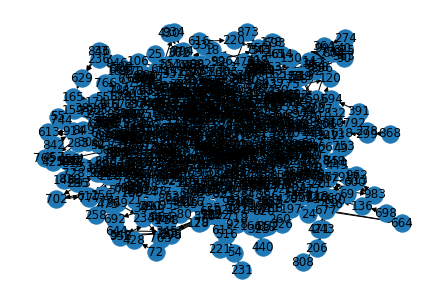

In [93]:
# bfs implementation
import random
import networkx as nx
import time

all_obj_map = {}

class Node:

    def __init__(self,name):
        self.name = name
        self.adjacency_list = []
        self.visited = False


def bredth_search(start_node):
    queue = [start_node]

    while queue:
        # get the first node 
        actual_node = queue.pop(0) # fifo fashion
        print(actual_node.name)
        actual_node.visited = True

        #get all neighbor of current node
        for n in actual_node.adjacency_list:
            if n.visited == False:
                queue.append(n)



def eval_node_str(node_list,source = None):
    nodes = [eval(f"Node('{x}')") if  isinstance(x,str) else x for x in node_list]
    return nodes


def replace_with_object_or_str(dict_obj,current_list):
    # print(dict_obj,current_list)
    all_obj_so_far_list = []
    final_list = []
    
    for one in dict_obj.keys():
        for obj in dict_obj[one]:
            # all_obj_so_far_list += dict_obj[one]
            if obj.name not in all_obj_map.keys():
                all_obj_map[obj.name] = obj
    # print("one to one map of all",all_obj_map,current_list)
    for one in current_list:
        name_list = [x for x in all_obj_map.keys()]
        if one in name_list:
            final_list.append(all_obj_map[one])
        else:
            final_list.append(one)
    # print(final_list,"final list")
    return final_list



if __name__ == "__main__":

    G=nx.DiGraph()
    n = 1000 # number of nodes
    i = 65 
    # all_names = [chr(i) for i in range(65,65 + n)] # this one for abcd type names can only be a few
    all_names = [str(i) for i in range(1,n)]
    # for one in all_names:
    G.add_nodes_from(all_names)
    all_obj_map = {}
    all_nodes = eval_node_str(all_names)#[eval(x) for x in all_nodes]
    all_obj_map = dict(zip(all_names,all_nodes))
    # print(all_nodes)
    iternodes = all_nodes
    already_defined_nodes = set()
    dict_of_nodes = {}
    for one in all_nodes:
        self_excluded = [x.name for x in all_nodes if x.name != one.name]
        num_of_random_neighbout = random.choice(range(3))
        if num_of_random_neighbout == 0:
            num_of_random_neighbout = 1
        nodes_to_connect = random.sample(self_excluded, num_of_random_neighbout)
        to_nx = [one.name] + nodes_to_connect
        edges_from_one = [(one.name,x) for x in nodes_to_connect]
        G.add_edges_from(edges_from_one)
        final_list = replace_with_object_or_str(dict_of_nodes,nodes_to_connect)
        nodes_to_connect =  eval_node_str(final_list,one.name)#str([f"Node('{x}')" for x in nodes_to_connect])
        one.adjacency_list = nodes_to_connect
        dict_of_nodes[one.name] = nodes_to_connect


    s = time.time()
    bredth_search(all_nodes[0])
    e = time.time()
    print(f"time took = {e-s}s")
    nx.draw(G,with_labels = True)

    # randomly connect 2 nodes in all nodes,, best way is to collect a list of random size 1- n and passit as adjacency except itself